In [255]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [256]:
# CSV 파일 로딩 (헤더 없음)
df = pd.read_csv("D:/car_evaluation.csv" , header=None)  # 헤더 없음으로 설정

# 데이터 확인
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [257]:
# 열 이름 확인
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [258]:
# Rename
df.columns=['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
df.columns # 열 이름 확인

Index(['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety',
       'output'],
      dtype='object')

In [259]:
df

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [260]:
# 결측치 확인 (변경 전)
print("\n결측치 확인:")
df.isnull().sum()


결측치 확인:


price           0
maint           0
doors           0
persons         0
lug_capacity    0
safety          0
output          0
dtype: int64


imbalanced data 확인:


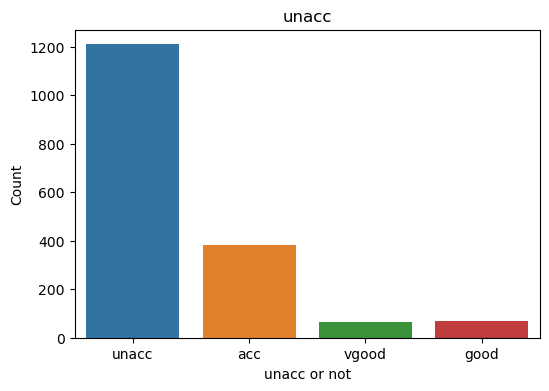

In [261]:
# 레이블 개수 확인(imbalanced data) - 그래프
print("\nimbalanced data 확인:")
plt.figure(figsize=(6, 4))  # 그래프 크기 설정

sns.countplot(data = df,  x='output')
plt.xlabel("unacc or not")
plt.ylabel("Count")
plt.title("unacc")
plt.show()

In [262]:
# 인코딩(숫자)
label_encoder = LabelEncoder() # LabelEncoder 초기화
for column in df.columns:  # 모든 컬럼을 인코딩
    df[column] = label_encoder.fit_transform(df[column])
df # 확인

,price,maint,doors,persons,lug_capacity,safety,output
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [263]:
# 레이블 개수 확인(imbalanced data) - 숫자
print("\n레이블 개수 확인:")
df['output'].value_counts()


레이블 개수 확인:


2    1210
0     384
1      69
3      65
Name: output, dtype: int64

In [264]:
# 입력(X)과 출력(y) 분리
X = df.drop('output', axis=1).values
y = df['output'].values

In [265]:
X # 확인

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [266]:
y # 확인

array([2, 2, 2, ..., 2, 1, 3])

In [267]:
# 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape # 346/(1382+346)=0.2

((1382, 6), (346, 6), (1382,), (346,))

In [268]:
# 1. 랜덤 포레스트 (Random Forest)
rf_model = RandomForestClassifier(random_state=0)  # 모델 생성
rf_model.fit(X_train, y_train)  # 학습
rf_pred = rf_model.predict(X_test)  # 예측
print("\n--- Random Forest Classifier ---")
print(accuracy_score(y_test,rf_pred))
print(confusion_matrix(y_test, rf_pred))  # 혼동 행렬 출력


--- Random Forest Classifier ---
0.9653179190751445
[[ 73   4   1   1]
 [  2  13   0   2]
 [  1   0 239   0]
 [  1   0   0   9]]


In [269]:
# 2. 의사결정 나무 (Decision Tree)
dt_model = DecisionTreeClassifier(random_state=0)  
dt_model.fit(X_train, y_train)  # 학습
dt_pred = dt_model.predict(X_test)  # 예측
print("\n--- Decision Tree Classifier ---")
print(accuracy_score(y_test,dt_pred))
print(confusion_matrix(y_test, dt_pred))  # 혼동 행렬 출력


--- Decision Tree Classifier ---
0.9682080924855492
[[ 71   4   4   0]
 [  0  17   0   0]
 [  2   0 238   0]
 [  1   0   0   9]]


In [270]:
# 3. 로지스틱 회귀 (Logistic Regression)
lr_model = LogisticRegression(random_state=0) 
lr_model.fit(X_train, y_train)  # 학습
lr_pred = lr_model.predict(X_test)  # 예측
print("\n--- Logistic Regression Classifier ---")
print(accuracy_score(y_test,lr_pred))
print(confusion_matrix(y_test, lr_pred))  # 혼동 행렬 출력


--- Logistic Regression Classifier ---
0.6502890173410405
[[  9   0  67   3]
 [  1   0  16   0]
 [ 22   0 214   4]
 [  2   0   6   2]]


In [271]:
# 4. 서포트 벡터 머신 (SVM)
svm_model = SVC(random_state=0)
svm_model.fit(X_train, y_train)  # 학습
svm_pred = svm_model.predict(X_test)  # 예측
print("\n--- SVM Classifier ---")
print(accuracy_score(y_test,svm_pred))
print(confusion_matrix(y_test, svm_pred))  # 혼동 행렬 출력


--- SVM Classifier ---
0.9219653179190751
[[ 64   4  10   1]
 [  4  10   0   3]
 [  2   0 238   0]
 [  3   0   0   7]]


In [272]:
# 5. 최근접 이웃 (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)  # KNN 모델 생성
knn_model.fit(X_train, y_train)  # 학습
knn_pred = knn_model.predict(X_test)  # 예측
print("\n--- K-Nearest Neighbors Classifier ---")
print(accuracy_score(y_test,knn_pred))
print(confusion_matrix(y_test, knn_pred))  # 혼동 행렬 출력


--- K-Nearest Neighbors Classifier ---
0.9046242774566474
[[ 60   2  17   0]
 [  5   8   3   1]
 [  2   0 238   0]
 [  1   0   2   7]]


C:\Users\tjdus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
